In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten, UpSampling2D  
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [28]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.
print(x_train.shape,x_test.shape)


(50000, 32, 32, 3) (10000, 32, 32, 3)


In [0]:
x_train = np.reshape(x_train, (50000, 3072))
x_test = np.reshape(x_test, (10000, 3072))

In [0]:
x_train_noisy = x_train + np.random.rand(50000, 3072) * 0.5
x_test_noisy = x_test + np.random.rand(10000, 3072) * 0.5

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [0]:
def plot(x, p, labels = False):
    plt.figure(figsize=(20,2))
    for i in range(10):
        plt.subplot(1,10,i+1)
        plt.imshow(x[i].reshape(32,32,3))
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()
    return


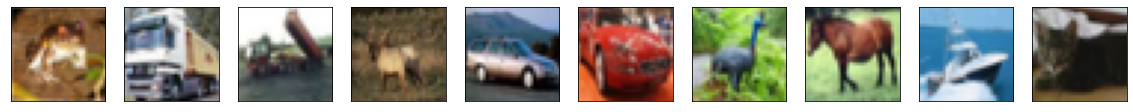

In [32]:
plot(x_train, None)

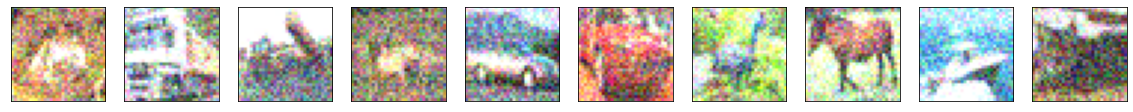

In [33]:
plot(x_train_noisy, None)

In [0]:
input_shape=(32,32,3)
batch_size=32
epochs=64

In [35]:
classifier = Sequential([
    Conv2D(32, (3,3), activation='relu',padding='Same' ,input_shape=input_shape),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu',padding='Same'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu',padding='Same'),
    MaxPooling2D(2,2),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')

])

classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(x_train.reshape(50000,32,32,3), y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/64
1250/1250 [==============================] - 103s 83ms/step - loss: 1.4572 - accuracy: 0.4681 - val_loss: 1.1449 - val_accuracy: 0.5933
Epoch 2/64
1250/1250 [==============================] - 103s 82ms/step - loss: 1.0931 - accuracy: 0.6102 - val_loss: 0.9772 - val_accuracy: 0.6549
Epoch 3/64
1250/1250 [==============================] - 103s 82ms/step - loss: 0.9513 - accuracy: 0.6632 - val_loss: 0.9390 - val_accuracy: 0.6693
Epoch 4/64
1250/1250 [==============================] - 103s 83ms/step - loss: 0.8468 - accuracy: 0.6997 - val_loss: 0.7787 - val_accuracy: 0.7273
Epoch 5/64
1250/1250 [==============================] - 104s 83ms/step - loss: 0.7661 - accuracy: 0.7315 - val_loss: 0.7694 - val_accuracy: 0.7344
Epoch 6/64
1250/1250 [==============================] - 105s 84ms/step - loss: 0.7011 - accuracy: 0.7499 - val_loss: 0.7431 - val_accuracy: 0.7449
Epoch 7/64
1250/1250 [==============================] - 104s 83ms/step - loss: 0.6462 - accuracy: 0.7720 - val_loss: 0

In [36]:
loss, acc = classifier.evaluate(x_test.reshape(10000,32,32,3), y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.7325 - accuracy: 0.7513


In [0]:
input_image = Input(shape=input_shape)
#encode
e= Conv2D(32,(3,3),activation='relu',padding='same')(input_image)
e=MaxPooling2D((2, 2))(e)
e= Conv2D(64,(3,3),activation='relu',padding='same')(e)
e=MaxPooling2D((2, 2))(e)
e= Conv2D(128,(3,3),activation='relu',padding='same')(e)
e=MaxPooling2D((2, 2))(e)
#decode
d= Conv2D(128,(3,3),activation='relu',padding='same')(e)
d=UpSampling2D((2,2))(d)
d= Conv2D(64,(3,3),activation='relu',padding='same')(d)
d=UpSampling2D((2,2))(d)
d= Conv2D(32,(3,3),activation='relu',padding='same')(d)
d=UpSampling2D((2,2))(d)
d=Conv2D(3, (3, 3), activation='softplus', padding='same')(d)

In [0]:
autoencoder = Model(input_image, d)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

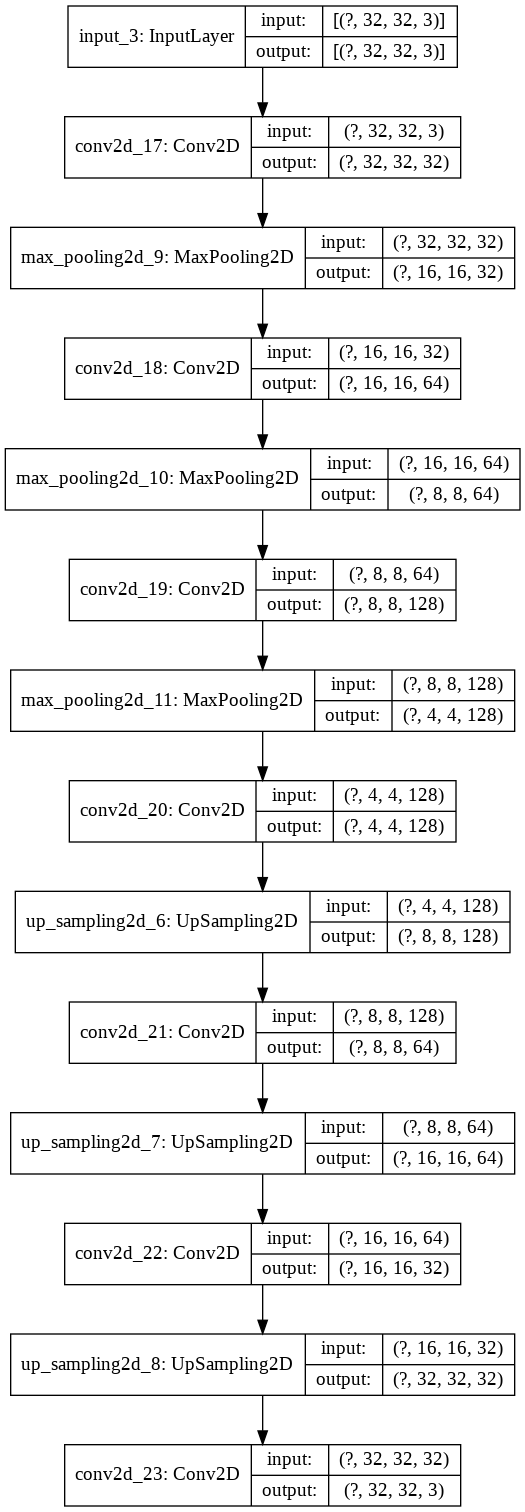

In [39]:
tf.keras.utils.plot_model(autoencoder, 'autoencoder.png', show_shapes=True)

In [40]:
autoencoder.fit(x_train_noisy.reshape(50000,32,32,3), x_train.reshape(50000,32,32,3),epochs=epochs, batch_size=batch_size,validation_split=0.2,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5)
    ]
)


Epoch 1/64
1250/1250 [==============================] - 296s 237ms/step - loss: 0.5916 - val_loss: 0.5783
Epoch 2/64
1250/1250 [==============================] - 297s 237ms/step - loss: 0.5843 - val_loss: 0.5867
Epoch 3/64
1250/1250 [==============================] - 298s 238ms/step - loss: 0.5866 - val_loss: 0.5844
Epoch 4/64
1250/1250 [==============================] - 296s 237ms/step - loss: 0.5789 - val_loss: 0.5787
Epoch 5/64
1250/1250 [==============================] - 298s 238ms/step - loss: 0.5766 - val_loss: 0.5762
Epoch 6/64
1250/1250 [==============================] - 296s 237ms/step - loss: 0.5757 - val_loss: 0.5777
Epoch 7/64
1250/1250 [==============================] - 298s 238ms/step - loss: 0.5732 - val_loss: 0.5732
Epoch 8/64
1250/1250 [==============================] - 296s 237ms/step - loss: 0.5735 - val_loss: 0.5838
Epoch 9/64
1250/1250 [==============================] - 297s 238ms/step - loss: 0.5733 - val_loss: 0.5758
Epoch 10/64
1250/1250 [=======================

In [0]:
preds = autoencoder.predict((x_test_noisy.reshape(10000,32,32,3)[0:10]).reshape(10,32,32,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


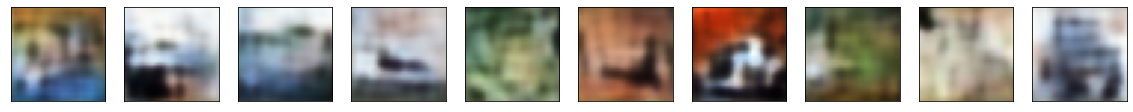

In [42]:
plot(preds, None)

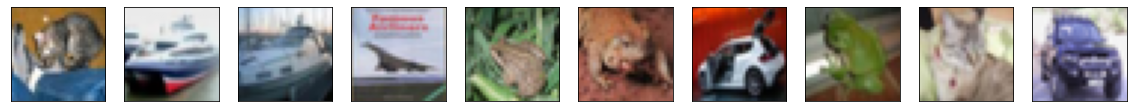

In [44]:
plot(x_test,None)

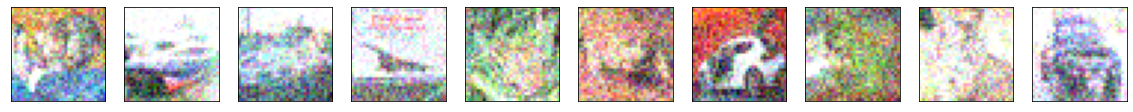

In [45]:
plot(x_test_noisy,None)

In [0]:
predictions=autoencoder.predict(x_test_noisy.reshape(10000,32,32,3))

In [47]:
loss, acc = classifier.evaluate(predictions.reshape(10000,32,32,3), y_test)

313/313 [==============================] - 7s 23ms/step - loss: 2.0989 - accuracy: 0.3814


In [0]:
noisy_image = Input(shape=input_shape)
x = autoencoder(noisy_image)
y = classifier(x)

denoise_and_classify = Model(noisy_image, y)

In [0]:
p = denoise_and_classify.predict(x_test_noisy.reshape(10000,32,32,3))

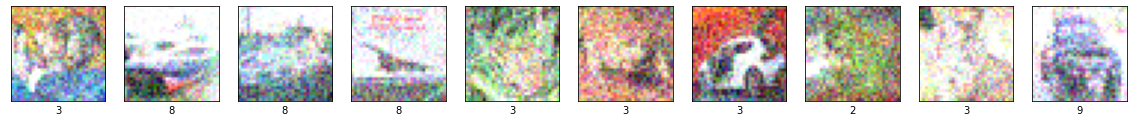

In [50]:
plot(x_test_noisy, p, True)

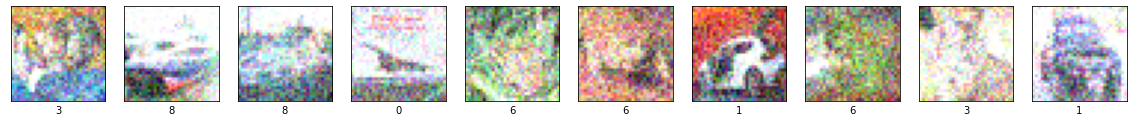

In [51]:
plot(x_test_noisy, to_categorical(y_test), True)